In [14]:
from pyspark.sql import SparkSession
from pyspark.sql import *
from pyspark.ml import *
from pyspark.sql.functions import when, col, max, min, lag, to_date

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Monte_Carlo") \
    .getOrCreate()

In [2]:
path = 'D:\Onedrive\Desktop\ThS\Khai phá các tập dữ liệu lớn\Monte_Carlo_Simulation\HOSE_2008_2022_vnstock.csv'

In [3]:
df = spark.read.option('header', True).option('delimiter', ',').csv(path, inferSchema=True)

In [15]:
df = df.withColumn("date", to_date(df["TradingDate"], "yyyy-MM-dd"))

In [4]:
df.show(5)

+---+-------+-------+-------+-------+-------+-----------+-----+
|_c0|   Open|   High|    Low|  Close| Volume|TradingDate|Stock|
+---+-------+-------+-------+-------+-------+-----------+-----+
|  0| 8552.0| 8552.0| 8552.0| 8552.0| 5380.0| 2009-09-24|  AAM|
|  1| 8965.0| 8965.0| 8965.0| 8965.0|12090.0| 2009-09-25|  AAM|
|  2| 9377.0| 9377.0| 9377.0| 9377.0| 9150.0| 2009-09-28|  AAM|
|  3| 9846.0| 9846.0| 9846.0| 9846.0|11530.0| 2009-09-29|  AAM|
|  4|10315.0|10315.0|10315.0|10315.0|29680.0| 2009-09-30|  AAM|
+---+-------+-------+-------+-------+-------+-----------+-----+
only showing top 5 rows



In [16]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- TradingDate: string (nullable = true)
 |-- Stock: string (nullable = true)
 |-- date: date (nullable = true)



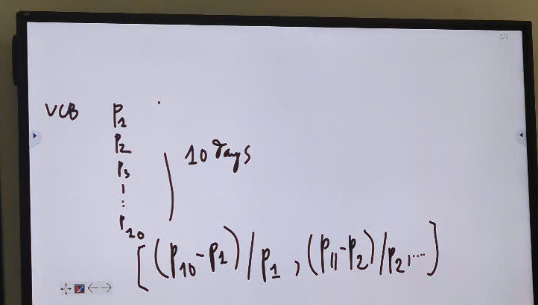

In [18]:
rolling_10_day_window = Window.partitionBy('Stock').orderBy('date')

In [19]:
df_with_lag = df.withColumn("Close_10_days_ago", lag('Close', 10).over(rolling_10_day_window))

In [22]:
df_with_lag.filter(df_with_lag["Close_10_days_ago"].isNull()).count()

2496

In [20]:
df_with_lag.limit(10).toPandas().tail(20)

,_c0,Open,High,Low,Close,Volume,TradingDate,Stock,date,Close_10_days_ago
0,0,21427.0,21427.0,21427.0,21427.0,2780.0,2011-06-20,BGM,2011-06-20,NaN
1,1,20356.0,20356.0,20356.0,20356.0,10.0,2011-06-21,BGM,2011-06-21,NaN
2,2,19374.0,19374.0,19374.0,19374.0,160.0,2011-06-22,BGM,2011-06-22,NaN
3,3,18481.0,18481.0,18481.0,18481.0,10.0,2011-06-23,BGM,2011-06-23,NaN
4,4,17588.0,17588.0,17588.0,17588.0,10.0,2011-06-24,BGM,2011-06-24,NaN
5,5,16785.0,16785.0,16785.0,16785.0,1350.0,2011-06-27,BGM,2011-06-27,NaN
6,6,15981.0,15981.0,15981.0,15981.0,1570.0,2011-06-28,BGM,2011-06-28,NaN
7,7,15267.0,15267.0,15267.0,15267.0,14500.0,2011-06-29,BGM,2011-06-29,NaN
8,8,14553.0,14553.0,14553.0,14553.0,37430.0,2011-06-30,BGM,2011-06-30,NaN
9,9,13838.0,13838.0,13838.0,13838.0,1480.0,2011-07-01,BGM,2011-07-01,NaN


In [21]:
df.count()

828796